# Nätverk
I detta avsnitt ska vi behandla vad som vanligen kallas *nätverk* (eng. *network*), samt senare mer specifikt sociala nätverk. Vi skall också översiktligt titta på vilka typer av kvalitativa och kvantitativa analyser som kan genomföras på nätverk.

## Vad är ett nätverk?

Vi kan börja med en form av tentativ definition av nätverk. Nätverk är en typ av specialfall av vad som inom matematiken vanligtvis kallas för en *graf*. Den formella definitionen av en graf är en uppsättning noder $V$ och kanter $E$. Vi kan således skriva 
$$ G = (V, E). $$
där beteckningarna $V, E$ kommer från engelskans *vertex* respective *edge*.

Nätverk utgör därför ofta en *modell* för att beskriva relationer hos data. Det är viktigt att inse att verkliga fenomen och dess data inte nödvändigtvis kommer från ett nätverk, utan att vi använder nätverksstrukturer för att beskriva dem. Det är därför skillnad på exempelvis vänskapsrelationer inom sociala medier (som Facebook, Twitter), vilka är explicit konstruerade som nätverk, samt verkliga vänskapsrelationer, som kan approximeras till sociala nätverk. 


## Grundläggande exempel
Vi börjar med ett exempel för att illustrera med en grundläggande, fördefinierad nätverksgraf. Vi kan välja att visualisera grafens egenskaper $V$ och $E$ som cirklar respektive linjer som sammankopplar cirklarna. Vi hade kunnat välja en långt mer esoterisk visualisering av grafen, men detta är helt klart den vanligaste.

In [1]:
from course.network import SAMPLE_NETWORK, Network, pairwise_intersection
from course.data import SAMPLE_OBSERVATIONS, CITIES, FLIGHTS, FAMILY, FAMILY_E, BRIDGES_V, BRIDGES_E
from course.data import color_from_betweenness_centrality, color_from_degree_centrality, color_from_closeness_centrality
import networkx as nx
import matplotlib.pyplot as plt
from bokeh.layouts import gridplot
from bokeh.io import show

Loading BokehJS ...

In [2]:
G = SAMPLE_NETWORK
show(G.plot())

I detta fall symboliserar noderna och kanter ingenting. Det är endast en struktur, liksom en kvadrat, rektangel eller polygon i geometri.

Vår graf är enkel och består av 7 noder och 6 kanter. En av noderna saknar helt kanter till övriga noder. Vi kan också se att nätverket består av totalt 3 *undergrafer* (eng. *subgraphs*), inklusive den graf bestående av endast en nod.

Om man kör om cellen för att visualisera grafen märks dock något anmärkningsvärt - positioneringen, placeringen av nätverkets noder är slumpmässig! Detta är oerhört viktigt för förståelsen av nätverk: **Positionen för noderna i en graf är betydelselös**, och tillhör inte definitionen! Det är helt enkelt samma graf oberoende vilken $(x,y)$-position noderna har. Genom att köra om cellen ändras inte nätverkets struktur, bara var noderna ligger på skärmen.



## Design av grafer
Vi kan nu dristas designa våra egna grafer. Vi ska använda oss av ett standardformat för nätverk, som lätt går att översätta i andra tänkbara format.

I Python kan vi lista noder på följande vis:


In [3]:
V = [
    {'id': 1}, # Första noden
    {'id': 2}, # Andra noden
    {'id': 3}, # o.s.v...
    {'id': 4}
]

Där varje nod har ett unikt attribut ``id`` för att skilja dem åt. Det är oerhört viktigt att nodernas id är unikt för att grafen ska vara väldefinierad.

Om vi vill lägga till kanter mellan noder, ger vi skapar vi på samma sätt en lista. Varje kant har ett attribut ``from`` och ett attribut ``to`` som refererar till ``id`` hos de noder kanten förbinder. Vi skapar en graf där en nod (``id=1``) har förbindelser till alla övriga noder.

In [4]:
E = [
    {'from': 1, 'to': 2}, # Eller {'to': 2, 'from': 1}, ordningen spelar ingen roll.
    {'from': 1, 'to': 3},
    {'from': 1, 'to': 4}
]

In [5]:
G = Network(V, E) # Definierat som i introduktionen
show(G.plot())

## Layouts: Nodernas placering
Som tidigare förklarat så är nodernas placering inte nödvändig för nätverkets definition: Det har fortfarande samma egenskaper. 

Ovan tilldelas noderna en slumpmässig position varje gång de visualiseras. Som visualisering blir dock nätverken bristande när de blir oigenkänneliga för människor om de ser olika ut varje iteration. Det vore exempelvis rimligt att noder som delar många kanter borde ligga nära intill varandra.

Vi börjar med att själva skapa en så kallad *layout*, att manuellt tilldela noderna attribut ``x`` och ``y``, den horisontella respektive vertikala positionen i planet.

In [6]:
V = [
    {'id': 1, 'x': 0, 'y': 0}, # Första noden
    {'id': 2, 'x': 0, 'y': 1}, # Andra noden
    {'id': 3, 'x': 1, 'y': 0}, # o.s.v...
    {'id': 4, 'x': 1, 'y': 1}
]

E = [
    {'from': 1, 'to': 2}, # Eller {'to': 2, 'from': 1}, ordningen spelar ingen roll.
    {'from': 1, 'to': 3},
    {'from': 1, 'to': 4}
]

In [7]:
G = Network(V, E) # Definierat som i introduktionen
show(G.plot())

För större grafer blir detta givetvis omständligt, såvida vi inte har någon algoritm för att beräkna lämpliga positioner för alla noderna. Lyckligtvis finns det förbestämda konfigurationer samt algoritmer för att visualisera nätverk. Vi tar ett par exempel nedan.

En cirkulär layout används ofta när man har väldigt få noder och/eller väldigt få kanter. I en sådan konfiguration placeras helt enkelt alla noder längs omkretsen hos en cirkel. Själva vinkelorienteringen är slumpmässig, och ordningen på noderna följer den i den inmatade nodlistan.

In [8]:
from networkx import random_layout, circular_layout, spring_layout

show(
    SAMPLE_NETWORK.plot(circular_layout, 
                    scale=0.5, 
                    center=(0.5,0.5))
)


Jag nämnde tidigare att layouten, eller positioneringen hos noderna är nödvändig för nätverkens definition eller funktion. Alla eventuella algoritmer som tillämpas på graferna fungerar lika bra oavsett hur de placeras i en figur. Däremot kan det vara till stor hjälp att välja en lämplig visualiseringen för att göra en analytisk besiktning av nätverket. En olämplig visualisering kan till och med vara skadlig.

I fallet nedan har vi en Petersen-graf, vilken när den arrangeras korrekt i ett plan ger intrycket av koncentriska nivåer i nätverket. Om fel visualiseringsmetod används blir denna aspekt osynlig.

In [9]:
G = Network.from_networkx(nx.petersen_graph())

as_concentric = G.plot(
       nx.shell_layout,
       title='Med explicita koncentriska cirklar',
       nlist=[range(5,10), range(5)],
       scale=0.5, 
       center=(0.5, 0.5))

as_circle = G.plot(
       nx.circular_layout, 
       title='Som enkel cirkel',
       scale=0.5, 
       center=(0.5, 0.5))

show(gridplot([[as_circle, as_concentric]], plot_width=300, plot_height=300)
    
)

De båda tidigare exemplen är vad man lämpligen kallar "konfigurationer", de kräver inga särskilda beräkningar eller algoritmer för att framställa.

Vanligen presenteras dock nätverk med hjälp av fysikalgoritmer som beräknar en optimal placering, vanligen i syfte att placera noder med många gemensamma kanter nära varandra, för att bilda så kallade "kluster". Sådana algoritmer är vanliga när ens nätverk består av fler noder än man kan inspektera manuellt. 

Algoritmiskt är nästan alla dessa metoder varianter av *the spring layout*, som modellerar noder som förbundna av mekaniska fjädrar. De simulerar därefter interaktionen mellan fjädrarna för att hitta ett jämviktsläge. Dessa algoritmer brukar ha en parameter för simuleringstiden, som vanligtvis sätts så att det inte tar för lång tid.

Fysiksimuleringar är dock beräkningsmässigt krävande, och vissa algoritmer kan ta oerhört lång tid för att presentera en layout till figurerna, i synnerhet om man har över tusen noder och kanter.

Nedan ser ni ett standardexempel hämtat från karaktärerna i Les Miserables.

In [10]:
G = Network.from_networkx(nx.generators.social.les_miserables_graph())

show(
    G.plot(nx.kamada_kawai_layout, 
       # k=0.05,
       scale=0.5, 
       center=(0.5, 0.5))
)

Alla grafer måste kunna formuleras på detta sätt, med noder som symboliserar någon form av entitet, och kanter som kan symbolisera någon form av förbindelse mellan två noder. Den strukturen som vi använt är mer eller mindre standard, och används av grafritningsverktyg så som Gephi.

Vi kan nu börja fundera på hur vi kan använda nätverksgrafer för modellering.

## Modellering med nätverk

Nätverks används ofta i samband med *sociala nätverk* och för humanister är detta kanske den mest kända tillämpningen. Nätverk är dock väsentligt mer mångsidiga i modelleringssammanhang. 

Om man som forskare vill använda sig av nätverk för att modellera ett problem eller ett system, finns det ett antal regler och förhållningssätt man bör förhålla sig till.

### Vad är noderna?
Noderna är *entiteter*, eller *storheter*. Det brukar nästan alltid röra sig om substantiv, i någon abstrakt mening. Noderna utgör en abstraktion och approximation av exempelvis människor, genom att i sociala nätverk reducera ner dem till säg namn och kön. 

#### Typ
Alla noder måste vara av samma *typ*. Detta brukar jag kalla *äppel- och päronprincipen*, man får inte blanda äpplen och päron i en korg som endast ska innehålla en av dem. I sociala nätverk är varje nod av typen *människa*. En typ är vanligtvis en abstraktion - *djur* är en abstraktion som inkluderar både människor och andra djur, *frukt* inkluderar allt de växtdelar vi vanligtvis kallar frukt, både stenfrukter och bär. En annan typ skulle kunna vara *organisation*, så att varje nod måste vara en grupp eller institution.

#### Observation/instans
Varje enskild nod utgör en *observation*. Samma nod får alltså inte förekomma flera gånger. Om noderna är människor får samma människa endast förekomma en gång.  I exemplet från *Les Misérables* är varje nod alltså en enskild människa med relationer till andra människo-noder.

Man säger att en nod är en *instans* av typen *människa* eller av typen *frukt*.

#### Attribut
Dessa observationer kan ha olika *attribut*. Det kan röra sig om *namn*, *ålder*, *kön*, *antal ben* för människor, eller egenskaper som *färg*, *kategori*, *ämne*, *författare* för andra typer av noder.

Exempel:
- Varje nod är ett litterärt verk, exempelvis "Mio, min Mio" med attributen "genre: barnbok", "författare: Astrid Lindgren".
- Varje nod är en apelsin, exempelvis den jag åt till frukost, med attributen "färg: orange".
- Varje nod är ett recept, exempelvis "Sockerkaka", med alla sina ingredienser som attribut.

Detta är inte bara nära relaterat till, utan exakt detsamma som de entiteter som beskrivits av Johan Åhlfeldt i en av era kurser förra året om databaser. En enkel databas över noder kan alltså se ut så här:


In [11]:
SAMPLE_OBSERVATIONS

,name,species,gender,rank,shows
0,Kirk,human,male,captain,"{Star Trek, Star Trek: The Next Generation}"
1,Scotty,human,male,lieutenant commander,"{Star Trek, Star Trek: The Next Generation}"
2,Spock,"half-human, half-vulcan",male,first officer,"{Star Trek: Discovery, Star Trek, Star Trek: T..."
3,Picard,human,male,captain,"{Star Trek: Deep Space Nine, Star Trek: The Ne..."
4,Janeway,human,female,captain,{Star Trek: Voyager}
5,Tuvok,vulcan,male,science officer,{Star Trek: Voyager}
6,Quark,ferengi,male,civilian,{Star Trek: Deep Space Nine}
7,Tilly,human,female,lieutenant,{Star Trek: Discovery}
8,Stamets,human,male,science officer,{Star Trek: Discovery}
9,Worf,klingon,male,lieutenant commander,"{Star Trek: Deep Space Nine, Star Trek: The Ne..."


### Vad är kanter/relationer?

Kanter eller ofta *relationer* är där magin skapas, och den definierande grunden för alla nätverk. Relationer mellan noderna kan definieras på olika vis och således ge upphov till olika nätverk. 

Vi kan börja med ovan exempel med karaktärer från *Star Trek*. Ett nätverk kan definieras med noder av typen *karaktär* med kanter om två karaktärer har varit med i samma show.


In [12]:
# Hitta 
E = list(pairwise_intersection(SAMPLE_OBSERVATIONS.to_dict('records'), 'shows', 'name'))

V = SAMPLE_OBSERVATIONS[['name']].rename(columns={'name': 'id'}).to_dict('records')

In [13]:
G = Network(V, E)
show(
    G.plot(nx.circular_layout, 
       scale=0.5, 
       center=(0.5,0.5))
)

### Exempel: Sociala nätverk

Sociala nätverk involverar individer, människor, oftast som noder. Konstruktionen varierar, men kan exempelvis definieras som att individerna har en relation om 

- de känner varandra
- de har lagt till varandra som "vän"
- de följer varandra
- de har arbetat på samma ställe

och så vidare. Facebook är ett specialfall av ett socialt nätverk per konstruktion, det är alltså ingen approximation i sig. Det kan vara svårt att få tillförlitliga relationer i verkliga fall dock - ofta är det vanskligt att etablera om två individer "känner varandra", och man tvingas gå omvägar, exempelvis om de deltagit i samma föreställning. Det blir en proxy och approximation för deras verkliga relation.

[Demonstration av projektet Expansion & Mångfald](https://dh.gu.se/network_demo/)

### Exempel: Städer och geografi

Många andra topologier i verkliga problem kan modelleras som nätverk. Vi betraktar ett antal städer i södra Sverige, och deras anslutningar till Europa-vägarna. Detta blir i praktiken en grov representation av Sveriges geografi, med en viktig skillnad - vi har inte explicit kodat in någon spatialitet.

Detta ger upphov till ett nätverk av städer och vägar, och därmed också närheten mellan städerna. Liknande representationer skulle kunna göras med exempelvis spårvagnshållplatser eller tågstationer.

In [14]:
CITIES

,name,roads
0,Göteborg,"{E45, E20, E6}"
1,Uddevalla,"{E45, E6}"
2,Kungsbacka,{E6}
3,Trollhättan,{E45}
4,Karlstad,{E18}
5,Örebro,"{E20, E18}"
6,Stockholm,"{E4, E20, E18}"
7,Helsingborg,"{E4, E6}"
8,Jönköping,{E4}


In [15]:
E = list(pairwise_intersection(CITIES.to_dict('records'), 'roads', 'name'))
V = CITIES[['name']].rename(columns={'name': 'id'}).to_dict('records')

G = Network(V, E)
show(
    G.plot(nx.kamada_kawai_layout, 
       # k=0.05,
       scale=0.5, 
       center=(0.5, 0.5))
)

Observera att då vi inte har givit någon explicit positionering av städerna kan vi inte återfå Sveriges geografi - men vi kan få vägnätverkets topologi. Det finns hintar av en geografi i form av *kluster* (Örebro, Karlstad, Stockholm), (Göteborg, Jönköping, Helsingborg), (Göteborg, Uddevalla, Kungsbacka, Trollhättan)

### Exempel: Flygrutter

Ett annat exempel på samma tema som gemene man kanske inte associerar med nätverk är flygrutter. Varje nod kan lämpligtvis vara en flygplats, och relationen mellan flygplatser definieras som existensen av en rutt mellan de båda. I Sverige har alltså Landvetter färre kopplingar än Arlanda. Varje flygplats har också relevanta attribut, exempelvis namn, land och storlek/kapacitet.

In [16]:
FLIGHTS.head(10)

,from,to
0,Arlanda,Kastrup
1,Arlanda,Oslo
2,Landvetter,Arlanda
3,Landvetter,Helsingfors
4,Kastrup,Landvetter
5,Oslo,Landvetter
6,Oslo,Helsingfors
7,Helsingfors,Arlanda
8,Helsingfors,Oslo


In [17]:
E = FLIGHTS.to_dict('records')

V = [{'id': v} for v in set(FLIGHTS['from'].values)]

In [18]:
G = Network(V, E)
show(
    G.plot(nx.circular_layout, 
       scale=0.5, 
       center=(0.5,0.5))
)

Observera att detta dock inte är hela bilden; detta nätverk skiljer sig nämligen från de vi har gått igenom tidigare. Varje flygplansrutt har tydliga start och slut på sina rutter, och ett plan som åker från Landvetter till Helsningfors måste inte nödvändigtvis ha en anslutning tillbaka, direkt väg. 

Detta betyder att nätverket är *riktat*. En riktad graf kan bara traverseras längs en kant åt de håll den tillåter. Vissa kanter har en riktning, vissa har två.

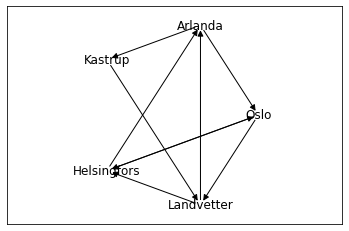

In [19]:
G = nx.DiGraph()
G.add_nodes_from([(v['id'], v) for v in V])
G.add_edges_from([e.values() for e in E])

options = {
    'node_color': 'white',
    'node_size': 100,
    'padding': 15,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
nx.draw_networkx(G, pos=nx.circular_layout(G), arrows=True, **options)
plt.xlim(-2,2)
plt.show()

### Exempel: Riktade nätverk
Vi har nu introducerat riktade nätverk, som lägger till ett attribut hos kanterna på grafen. Flygplansrutter är ett typexempel på riktade grafer, medan exempelvis vägnätverk typiskt är oriktade - vägarna löper oftast åt båda håll. Riktade grafer är också väldigt viktiga i sociala nätverk, och många typer av relationer *måste* representeras med en riktning.

**Facebook vs. Twitter**<br>
Facebook är känt nog oriktat - när du lägger till någon som en vän får ni båda en kant mellan varandra. Twitter emellertid, har ett "följarsystem", där du följer andra användare, som dock inte måste följa dig tillbaka. Detta skapar en kant riktad från dig till den du följer. I Facebooks fall har även de introducerat möjligheten att följa folk utan att lägga till dem som vän - de har alltså två nätverk, ett nätverk med oriktade kanter, och ett med riktade kanter av följare. 

**Telefonnummer**<br>
Ett annat exempel på riktade kanter är telefonnummer i din telefonbok - du kan ha numret till någon som inte nödvändigtvis har ditt telefonnummer. Då kan du ringa denna person, men de kan inte ringa dig. 

### Exempel: Släktträd
Ett släktträd är ett så kallat träd, ett specialfall av nätverk där det finns en riktning i hela grafen. I släktträd utgörs noderna av individer, och kanterna representerar att man är barn till noden. Ofta utelämnas riktningen på kanterna i släktträd och istället kommuniceras denna information visuellt genom *layouten* istället.

I ett släktträd är ofta kanterna i en annan stil än de vi är vana vid, och går istället ihop till en gemensam linje till ättlingen. Detta ändrar dock inte nätverkets betydelse.

In [20]:
FAMILY

,name,children,x,y
0,Per,"{Elias, Gudmund}",0.35,1.00
1,Gun,"{Elias, Gudmund}",0.65,1.00
2,Elias,{Siv},0.35,0.75
3,Adelia,{Siv},0.65,0.75
4,Gudmund,{},0.05,0.75
5,Siv,{},0.35,0.50


In [21]:
G = Network(FAMILY.drop('children', axis=1).rename(columns={'name': 'id'}).to_dict('records'), FAMILY_E.to_dict('records'))
show(G.plot())

## Nätverksanalys
Nätverk är en så kallad datastruktur, och en representationsmodell av relationer i verkligheten. De utgör dock i sig själva inte en form av analys. Nätverk som visade hittills är en form av visualisering av relationer.  

Det är dock vanligt att utnyttja nätverk för att karaktärisera och prediktera information hos verkliga fenomen. Detta brukar klumpas ihop till så kallad nätverksanalys. Det finns ett antal mått (alla matematiska) för att karaktärisera nätverk. De vanligaste är *grad*, *gleshet*, *centralitet* och *bryggor*.

### Grad
Varje nod i ett nätverk har en grad (*eng. degree*), motsvarande antalet kanter/relationer hos noden. Detta mått säger oss hur välansluten noden, exempelvis hur många vänner noden har i ett socialt nätverk, eller antalet stora vägar om noden är en stad. 

Grad kan anges på två sätt:
- Antal kanter (heltal)
- Procent, eller bråkdel, av kanter till alla möjliga noder

Om ett nätverk har 100 noder, kan en viss nod med 7 kanter anges ha grad 7 eller grad 7/100 = 0.07. Det senare är att föredra då siffran är oberoende totala antalet noder i nätverket. Om en nod har grad 0.5 har det alltså en kant med hälften av alla andra noder.

### Gleshet
Ett nätverk med många noder och mycket få kanter kallas glest (*eng. sparse*), och ett nätverk med många kanter kallas omvänt tätt (*eng. dense*). Ett nätverk där alla noder är anslutna med varandra kallas i bland *fully connected*.

### Centralitet
Centralitet (*eng. centrality*) är inte ett begrepp, utan en samling mått på hur "centrala" noderna är i nätverket. Detta är inte ett väldefinierat begrepp a priori, utan det finns en mängd olika typer av centralitet som mäter olika saker. Dessa är inherent matematiska, och har en matematisk definition. Det är dock viktigt att förstå att centralitet är ett värde som löper från 0 (ocentral) till 1 (central).

#### Degree centrality
Så kallad *degree centrality* är det enklaste centralitetsmåttet: Degree centrality är antalet noder en nod är ansluten till, det vill säga graden hos noden. Om en nod har kanter till 6 av 100 noder, har den gradtal (*degree*) 0.06, och då även degree centrality 0.06. 

#### Closeness centrality
En annan typ av centralitet baseras på avstånden till andra noder. *Closeness centrality* är ett mått på hur långt bort alla andra noder ligger från en given nod. För att förstå detta måste man definiera "avstånd" i en graf. Vanligtvis definieras detta som antalet kanter mellan två noder. 

Closeness centrality beräknas som medelavståndet av det kortaste avståndet från en nod till alla andra.


#### Betweenness centrality
*Betweenness centrality* kvantifierar hur mycket en nod ligger mellan andra noder, och är nära relaterad till closeness centrality. Betweenness motsvarar andelen gånger en nod agerar som en brygga på den kortaste vägen mellan två andra noder. 




In [22]:
# Get the Les Misérables network
G = Network.from_networkx(nx.generators.social.les_miserables_graph())

# Calculate centrality and get a set of colors
degree_colors = color_from_degree_centrality(G, colormap='YlOrRd')
betweenness_colors = color_from_betweenness_centrality(G, colormap='YlOrRd')
closeness_colors = color_from_closeness_centrality(G, colormap='YlOrRd')

# Arrange plots
g1 = G.plot(nx.kamada_kawai_layout, 
       fill_color=degree_colors,
       title='Degree centrality')

g2 = G.plot(nx.kamada_kawai_layout, 
       fill_color=closeness_colors,
       title='Closeness centrality')

g3 = G.plot(nx.kamada_kawai_layout, 
       title='Betweenness centrality',
       fill_color=betweenness_colors)

grid = gridplot([[g1, g2, g3]], plot_width=300, plot_height=300)
show(grid)

En *brygga* är formellt en kant som sammankopplar två **undernätverk**, och utan denna kant skulle nätverken vara frikopplade varandra. I en mindre formell betydelse är en brygga en eller fler individer som sammankopplar nätverken. Detta begrepp är djupt sammankopplat med betweenness som ju är andelen kortaste vägar genom en viss nod. Ofta används betweenness just för att identifiera bryggor i större nätverk.

In [23]:
G = Network(BRIDGES_V, BRIDGES_E)

betweenness_colors = color_from_betweenness_centrality(G, colormap='YlOrRd')
show(
    G.plot(nx.kamada_kawai_layout,
            fill_color=betweenness_colors)
    )